# Análise de Dados com Métodos de Aprendizado de Máquina

## Introdução ao Aprendizado de Máquina

### Daniel Rocha da Silva, Laura Kubitschek Fiorindo

Link para repositório no GitHub: [Repositório no GitHub](https://github.com/danielrochas/ML_Trabalho/tree/main/Trabalho%202)

Descrição do trabalho: [Descrição.pdf](https://github.com/danielrochas/ML_Trabalho/blob/main/Trabalho%202/Descrição.pdf)

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.svm import SVR

### Problema 1

Importação e visualização do banco de dados

In [ ]:
prostate_data = pd.read_csv('data/prostate.data', sep="\t")
prostate_data

Visualização da variável resposta

In [ ]:
%matplotlib inline

plt.hist(prostate_data["lpsa"])

A partir do histrograma da variável resposta *lpsa* é possível perceber que ela possui distribuição semelhante à Normal, uma vez que possui maior frequência nos valores centrais e menor frequência nas caudas a esquerda e a direita.

Separação entre *features* e *target*

In [ ]:
features_prostate = prostate_data.drop(columns = {"%", "lpsa"})
target_prostate = prostate_data["lpsa"]

Padronização das *features*

In [ ]:
scaler = StandardScaler()
features_prostate_scaled = scaler.fit_transform(features_prostate)

Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [ ]:
features_prostate_train, features_prostate_test, target_prostate_train, target_prostate_test = \
    train_test_split(features_prostate_scaled, target_prostate, test_size = 0.2, random_state = 13)

Ajuste da Regressão Linear e cálculo de medidas de validação para o conjunto teste

In [ ]:
lr_prostate = LinearRegression()
lr_prostate.fit(features_prostate_train, target_prostate_train);

# Validação Conjunto Teste
print("R^2 Conjunto Teste: ", round(lr_prostate.score(features_prostate_test, target_prostate_test),2))
target_predicted = lr_prostate.predict(features_prostate_test)
print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, target_predicted),2))

print("\n")

print("Intercepto", round(lr_prostate.intercept_,2))
for i in range(len(lr_prostate.coef_)):
    print(prostate_data.columns[i+1],":", round(lr_prostate.coef_[i],2))

A partir dos valores apresentados acima, nota-se que as *features lcavol, lweigh, lbph, svi, gleason* e *pgg45*, por possuírem valores positivos dos coeficientes, contribuem de maneira positiva para o valor da variável resposta *lpsa*. Ou seja, o aumento do valor dessas variáveis provoca também um aumento no valor da resposta. Vale ressaltar que esse aumento provocado pelas variáveis *lbph, gleason* e *pgg45* é pequeno devido ao pequeno valor do coeficiente, em contrapartida, as variáveis *lcavol, lweigh* e*svi* possuem maior contribuição, por conta do maior valor de seus coeficientes.

Por sua vez, as variáveis *age* e *lcp* possuem contribuição negativa sobre a variável resposta *lpsa*, pois, por terem o valor do coeficiente associado a elas negativo, um aumento no valores dessas covariáveis provoca uma redução no valor da resposta.

O modelo de regressão linear ajustado obteve o valor R-quadrado de 0.64, indicando que 64% da variabilidade da variável resposta está sendo explicada pelo modelo linear ajustado. Já o valor do erro quadrático médio, que deve sempre ser minimizado, para o modelo construído, foi obtido o valor de 0.6.

### Problema 2

In [ ]:
card_data = pd.read_csv('data/card.csv', sep=",")
card_data

Visualização da variável resposta

In [ ]:
%matplotlib inline


unique, counts = np.unique(card_data["y"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (y)')

Por meio do gráfico acima, é possível notar que a variável resposta, que é categórica, possui apenas 2 níveis, sendo eles 0 ou 1. Além disso, as duas categorias possuem frequências próximas, indicando que os dados estão, de certa forma, balanceados de acordo com a variável resposta. Nesse problema serão ajustados 3 modelos diferentes para avaliação das métricas, são eles: KNN (k=5), Naive Bayes e Regressão Logística.

Separação entre *features* e *target*

In [ ]:
features_card = card_data.drop(columns = {"y"})
target_card = card_data["y"]

Padronização das *features*

In [ ]:
scaler = StandardScaler()
features_card_scaled = scaler.fit_transform(features_card)

Aplicando o método 5-vizinhos mais próximos

In [ ]:
neigh_card = KNeighborsClassifier(n_neighbors=5)
neigh_card.fit(features_card_scaled, target_card);

# Validação cruzada com método 10-fold
print("Dados normalizados:")
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "accuracy")
print("\n")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "recall")
print("\n")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "precision")
print("\n")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "f1")
print("\n")
print("f1: ", score, "Média: ", np.mean(score))

print("\n")
print("Dados originais:")
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "accuracy")
print("\n")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "recall")
print("\n")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "precision")
print("\n")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "f1")
print("\n")
print("f1: ", score, "Média: ", np.mean(score))

Ao ajustar o modelo de 5 vizinhos mais próximos nos dados padronizados e nos dados originais, observou-se melhor resultado no modelo em que foi utilizado os dados originais. Considerando o modelo com os dados originais, foram obtidas as seguintes métricas de avaliação do modelo:

* acurácia média de 0.84;
* sensibilidade média de 0.87
* precisão média de 0.85
* f1 médio de 0.86

Aplicando o método Naive Bayes

In [ ]:
gaussian_nb_card = GaussianNB()
gaussian_nb_card.fit(features_card, target_card);

# Validação cruzada com método 10-fold
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Ao ajustar o modelo naive bayes nos dados originais, foram obtidas as seguintes métricas de avaliação do modelo:

* acurácia média de 0.69;
* sensibilidade média de 0.96
* precisão média de 0.64 
* f1 médio de 0.77

Comparando os resultados do modelo KNN e Naive Bayes, observou-se que o primeiro possui métricas de avaliação melhores, por possuir valores maiores dessas medidas, exceto quando se trata da sensibilidade. Nesse caso, como o modelo naive bayes possui alta sensibilidade ele é bom para identificar instâncias positiva quanto a concessão quando ela é realmente positiva. No entanto, nesse caso a precisão do modelo não é tão boa, indicando que ao classificar uma instância como positiva existe uma proporção considerável delas que na realidade é negativa.

Aplicando o método de Regressão Logística

In [ ]:
logistic_regression_card = LogisticRegression()
logistic_regression_card.fit(features_card_scaled,target_card)

score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Ao ajustar o modelo de regressão logística nos dados originais, foram obtidas seguintes métricas de avaliação do modelo:

* acurácia média de 0.86;
* sensibilidade média de 0.85
* precisão média de 0.90
* f1 médio de 0.87

Comparando o modelo logístico com os demais, ele possui sensibilidade inferior aos modelos KNN e Naive Bayes, no entanto, para as demais métricas, obteve medidas mais elevadas se comparadas com os demais modelos. Nesse caso, cabe ao banco avaliar qual métrica deve ser maximizada em um modelo para classificação da concessão de crédito. Uma alta sensibilidade indica que o modelo prevê bem instâncias como positiva quanto a concessão quando ela é realmente positiva. No entanto, também é interessante que a precisão do modelo seja alta, para assim evitar prejuízos ao aumentar a proporção de observações verdadeiramente positivas quando elas foram classificadas positivas. Nesse sentido, o modelo de regressão logística parece ser ideal, tendo valores altos para todas métricas de avaliação.

### Problema 3

Importação e visualização do banco de dados

In [ ]:
college_data = pd.read_csv("data/College.csv")
college_data

Foi feita a troca da variável *Top10perc* pela variável *Elite*, sendo esta uma variável que assume o valor 0 para valores da variável *Top10perc* no intervalo (-1, 50] e 1 para valores no intervalo (50, 101].

In [ ]:
college_data["Elite"] = pd.cut(college_data["Top10perc"], bins = (-1,50,101), labels = False)
college_data = college_data.drop(columns = {"Top10perc"})

Foi feita a troca da variável Private para valores inteiros (Yes = 1; No = 0).

In [ ]:
college_data["Private"] = np.where(college_data["Private"] == 'Yes', 1, 0)

Visualização da variável resposta

In [ ]:
%matplotlib inline


unique, counts = np.unique(college_data["Elite"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (Elite)')

Com o gráfico acima podemos perceber como a variável resposta apresenta classes (0, 1) com frequência nos dados desbalanceada. Isso deve ser observado nos modelos feitos a seguir.

Separação entre *features* e *target*

In [ ]:
features_college = college_data.drop(columns = {"Inst.Name", "Elite"})
target_college = college_data["Elite"]

Foi feita a padronização das *features*

In [ ]:
scaler = StandardScaler()
features_college_scaled = scaler.fit_transform(features_college)

Aplicamos o método K-vizinhos

In [ ]:
neigh_college = KNeighborsClassifier(n_neighbors=5)
neigh_college.fit(features_college_scaled, target_college);

# Validação cruzada com método 10-fold
print("Dados normalizados:")
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

print("\n")
print("Dados originais:")
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Como podemos ver com os resultados acima conseguimos resultados melhores com a normalização das *features*. 

Podemos perceber também que a medida de acurácia pode ser enganosa já que, neste caso, temos classes bem desbalanceadas. Por isso as medidas *recall*, *precision* e *f1* são mais interessantes para a situação.

Aplicamos Naive Bayes

In [ ]:
gaussian_nb_college = GaussianNB()
gaussian_nb_college.fit(features_college, target_college);

# Validação cruzada com método 10-fold
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Com o *Naive Bayes Gaussiano* não precisamos normalizar as *features*.

Podemos perceber com as métricas apresentadas acima que os resultados obtidos com o método de *Naive Bayes* foram melhores pela métrica *recall*. Esta métrica representa a proporção de classificações 1 corretamente identificadas pelo modelo dentre todas as verdadeiras classificações 1 nos dados, essa medida, em geral é muito importante e um incremento nela é algo significativo. Já na métrica *precision* tivemos uma piora em relação ao modelo k-vizinhos. Esta métrica representa a proporção de classificações 1 feitas pelo modelo que realmente são classificações 1 nos dados.

### Problema 4

In [ ]:
boston_data = pd.read_csv("data/Boston.csv", sep = ";", decimal = ",")
boston_data.head(5)

###### Visualização da variável resposta

In [ ]:
%matplotlib inline

plt.hist(boston_data["medv"])

A partir do histograma da variável resposta *medv*, observa-se que sua distribuição assemelha-se com uma normal, com valores mais frequentes no intervalo central e frequência reduzida nas caudas. 

###### Separação entre features e target e Padronização das features

In [ ]:
# Separação do Banco
features_boston = boston_data.drop(columns = {"medv"})
target_boston = boston_data["medv"]
# Padronização das Features
scaler = StandardScaler()
features_boston_scaled = scaler.fit_transform(features_boston)

###### Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [ ]:
features_boston_train, features_boston_test, target_boston_train, target_boston_test = \
    train_test_split(features_boston_scaled, target_boston, test_size = 0.2, random_state = 42)

###### Ajuste e Resultado do Primeiro Trabalho

In [ ]:
lr_boston = LinearRegression()
modelo_lr_boston =lr_boston.fit(features_boston_train, target_boston_train);

# Validação
print("R^2: ", modelo_lr_boston.score(features_boston_test, target_boston_test))

print("\n")

print("Intercepto", modelo_lr_boston.intercept_)
for i in range(len(modelo_lr_boston.coef_)):
    print(boston_data.columns[i], modelo_lr_boston.coef_[i])

print("\n")
    
target_predicted = modelo_lr_boston.predict(features_boston_test)
print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test, target_predicted),2))

print("Acurácia Base Teste:{:.3f}".format(modelo_lr_boston.score(features_boston_test,target_boston_test)))

###### Ajuste Árvore de Decisão

In [ ]:
decisiontree = DecisionTreeRegressor(random_state=0)
arv_dec_boston = decisiontree.fit(features_boston_train, target_boston_train)

print("Acurácia Base Teste:{:.3f}".format(decisiontree.score(features_boston_test,target_boston_test)))

pred_arv_dec_boston = arv_dec_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_arv_dec_boston)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_boston_test, pred_arv_dec_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test, pred_arv_dec_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test, pred_arv_dec_boston),2))

###### Ajuste Floresta Aleatória

In [ ]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
rand_for_boston = randomforest.fit(features_boston_train, target_boston_train)

print("Acurácia Base Teste: {:.3f}".format(rand_for_boston.score(features_boston_test,target_boston_test)))

pred_rand_for_boston = rand_for_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_rand_for_boston)
print('Escore Variância Explicada: {0:0.2f}'.format(explained_variance))

mae = mean_absolute_error(target_boston_test, pred_rand_for_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test,pred_rand_for_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste:",round(mean_squared_error(target_boston_test, pred_rand_for_boston),2))

###### Ajuste SVM

In [ ]:
svm = SVR(kernel="linear")
svm_boston = svm.fit(features_boston_train, target_boston_train)

print("Acurácia Base Teste:{:.3f}".format(svm_boston.score(features_boston_test,target_boston_test)))

pred_svm_boston = svm_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_svm_boston)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_boston_test, pred_svm_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test,pred_svm_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test,pred_svm_boston),2))

###### Comparação e Análise dos Resultados

Nota-se que, os modelos ajustados via árvore de decisão e floresta aleatória obtiveram melhor valores de acurácia no banco de teste se comparadso com os valores obtidos na regressão linear feito anteriormente e no SVM para regressão aplicado agora. Comparando as métricas calculadas para os dois melhores modelos (árvore de decisão e a floresta aleatória), é possível observar que eles possuem valores muito próximos, porém, além da árvore possuir uma acurácia um pouco mais alta e um erro quadrático médio menor, ela possui como vantagem a sua interpretabilidade, portanto vai ser usada como referência de melhor modelo.

Abaixo, tem-se o gráfico com a importância de cada uma das covariáveis para a contrução desse modelo. A variável com maior importância é *rm*, que destaca-se muito em relação as demais, seguidas das covariáveis *lstat* e *dis*.

In [ ]:
importances = arv_dec_boston.feature_importances_
indices = np.argsort(importances)[::-1]
names = [boston_data.columns.tolist()[i] for i in indices]
plt.figure()
plt.title("Importância das Variáveis")
plt.bar(range(features_boston_train.shape[1]),
importances[indices])
plt.xticks(range(features_boston_train.shape[1]), names,rotation=90)
plt.show()

### Problema 5

In [45]:
enem_data_na = pd.read_csv("data/DadosEnemCandidatosMG.csv", sep = ";", decimal = ",")
enem_data_na.head(5)

,IDADE,TP_SEXO,ST_CONCLUSAO,IN_TP_ENSINO,IN_CERTIFICADO,TP_ESTADO_CIVIL,TP_LINGUA,Q01,Q02,Q03,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,NU_NT_CN
0,20,M,3,,1,0,1,A,C,B,...,4,5,4,E,A,A,F,B,A,
1,31,F,1,1,0,1,0,A,A,A,...,5,5,5,D,A,A,B,B,A,
2,27,F,1,1,0,1,0,A,C,C,...,5,0,5,A,A,A,B,A,A,
3,19,F,1,1,0,0,1,B,A,I,...,5,4,4,B,A,A,B,A,A,342.3
4,26,F,1,1,0,0,1,A,I,B,...,5,0,5,C,A,A,D,B,A,411.6


In [46]:
enem_data_na.shape

(382179, 26)

A partir da visualização dos dados inicial é possível notar que esse banco de dados possui NAs, tanto em algumas covariáveis quanto na variável resposta. Como o objetivo principal do trabalho é avaliar diferentes modelos para prever a nota final dos candidatos e o banco de dados possui informações de muitos candidatos, optou-se por descartar as linhas com valores faltantes.

In [ ]:
enem_data_na.replace(" ", pd.NaT, inplace=True)
enem_data = enem_data_na.dropna()
enem_data.head(5)

In [49]:
enem_data.shape

(180638, 26)

Após a remoção de linhas que continham NAs, o tamanho do banco passou de 382179 observações para 180638. O banco continua sendo grande para o ajuste de um modelo para predição da resposta, dessa forma iremos prosseguir o estudo.

Outro detalhe importante para realizar o ajuste dos modelos é verificar como as variáveis estão sendo interpretadas, isto é, seus tipos. A seguir foram feitas uma série de transformações a fim de que o melhor ajuste possível fosse realizado.

* Alteração na codificação de algumas variáveis para aproveitar a sua característica ordinal;
* Alteração do tipo de algumas covariáveis para melhor ajuste.

In [ ]:
enem_data = enem_data.replace({"Q28": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
                               "Q29": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4},
                               "Q31": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5},
                               "Q32": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}})

In [ ]:
enem_data.dtypes

In [51]:
variavel_tipo = {'TP_SEXO': 'category',
                 'IN_TP_ENSINO': 'category',
                 'IN_CERTIFICADO': 'category',
                 'TP_ESTADO_CIVIL': 'category',
                 'TP_LINGUA': 'category',
                 'Q01': 'category',
                 'Q02': 'category',
                 'Q03': 'category',
                 'Q04': 'category',
                 'Q05': 'category',
                 'Q06': 'category',
                 'Q07': 'category',
                 'Q08': 'category',
                 'Q30': 'category',
                 'Q33': 'category',
                 'NU_NT_CN': 'float'}
enem_data = enem_data.astype(variavel_tipo)

In [52]:
colunas_categoricas = ['TP_SEXO','IN_TP_ENSINO','IN_CERTIFICADO','TP_ESTADO_CIVIL','TP_LINGUA','Q01','Q02','Q03',
                       'Q04','Q05','Q06','Q07','Q08','Q30','Q33']

enem_data = pd.get_dummies(enem_data, prefix = colunas_categoricas,
                           columns = colunas_categoricas)

In [54]:
enem_data

,IDADE,ST_CONCLUSAO,Q24,Q25,Q26,Q27,Q28,Q29,Q31,Q32,...,Q30_E,Q30_F,Q30_G,Q30_H,Q33_A,Q33_B,Q33_E,Q33_F,Q33_G,Q33_H
3,19,1,4,5,4,4,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,26,1,5,5,0,5,2,0,3,1,...,0,0,0,0,1,0,0,0,0,0
6,24,1,4,5,2,5,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7,30,1,3,5,0,5,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,29,1,5,5,5,5,5,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382078,18,1,5,5,5,5,5,4,4,4,...,0,0,0,1,0,0,0,0,0,1
382094,21,1,0,5,0,0,1,4,2,4,...,0,1,0,0,0,0,0,0,0,1
382096,44,1,5,5,5,5,5,4,5,4,...,0,0,0,0,0,0,0,0,0,1
382106,31,1,4,5,4,5,5,1,4,4,...,0,0,0,0,0,0,0,0,0,1


###### Visualização da Variável Resposta

(array([4.4790e+03, 8.9510e+03, 8.9230e+03, 1.0652e+04, 1.2250e+04,
        1.2980e+04, 1.3031e+04, 1.2842e+04, 1.2870e+04, 1.3270e+04,
        1.4051e+04, 1.3661e+04, 1.2284e+04, 1.0188e+04, 7.2310e+03,
        4.7320e+03, 3.0550e+03, 1.9410e+03, 1.2870e+03, 7.9800e+02,
        4.9700e+02, 2.7600e+02, 1.7800e+02, 1.0300e+02, 6.0000e+01,
        2.7000e+01, 1.4000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([313.4 , 335.26, 357.12, 378.98, 400.84, 422.7 , 444.56, 466.42,
        488.28, 510.14, 532.  , 553.86, 575.72, 597.58, 619.44, 641.3 ,
        663.16, 685.02, 706.88, 728.74, 750.6 , 772.46, 794.32, 816.18,
        838.04, 859.9 , 881.76, 903.62, 925.48, 947.34, 969.2 ]),
 <BarContainer object of 30 artists>)

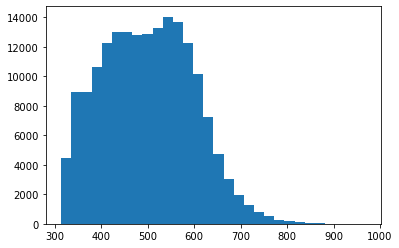

In [55]:
%matplotlib inline

plt.hist(enem_data["NU_NT_CN"], bins = 30)

A partir do histograma das notas dos candidatos, nota-se que notas maiores que 700 possuem frequência muito baixa, enquanto que o intervalo entre 400 e 600 possui uma alta frequência de ocorrência. É válido ressaltar também que a fequência na cauda da esquerda, notas entre 300 e 400, possui maior frequência se comparada com a cauda da direita a partir do valor de 700

###### Analisando Covariáveis

Com exceção da covariável idade, todas demais features devem ser consideradas como categóricas. A partir do comando acima nota-se que nem todas estão sendo interpretadas da maneira correta, dessa forma é necessário corrigir seus tipos para realizar o ajuste dos modelos.

###### Separação entre *features* e *target*

In [56]:
features_enem = enem_data.drop(columns = {"NU_NT_CN"})
#features_enem = enem_data.TP_SEXO
target_enem = enem_data["NU_NT_CN"]

###### Ajuste Árvore de Decisão

In [57]:
decisiontree = DecisionTreeRegressor(random_state=13)
score = cross_val_score(decisiontree, features_enem, target_enem,cv=10)
print(score)

[-0.64652931 -0.78974628 -0.48600665 -0.60488856 -0.61420612 -0.57956632
 -0.63895756 -0.63669896 -0.65794195 -0.58941618]


###### Ajuste Floresta Aleatória

###### Ajuste Regressão com Regularização